# Exploratory Data Analysis of  Hospital Readmission data for Diabetes patients

The Centers for Medicare & Medicaid Services, CMS which is part of the Department of Health and Human Services (HHS) has created many programs to improve the quality of care of patient as the healthcare system moves toward value-based care. Hospital Readmission Reduction Program (HRRP), which is one of them , reduces reimbursement to hospitals with above average readmissions. For those hospitals which are currently penalized under this program, one solution is to create interventions to provide additional assistance to patients with increased risk of readmission. 
I propose to use predictive modeling from data science to help identify patients with a risk for hospital readmission.

In [15]:
#initial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Mining / EDA / dimensionality reduction
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


## Dataset Exploration

#Initial examination of csv file shows that null values are indicated by  '?' in csv file.

In [16]:
diabetic_data = pd.read_csv('diabetic_data.csv', index_col='encounter_id', na_values="?", low_memory=False)
eda_data = pd.read_csv('diabetic_data.csv',  na_values="?",low_memory=False)

In [17]:
print('Number of samples:',len(diabetic_data))

Number of samples: 101766


In [18]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 2278392 to 443867222
Data columns (total 49 columns):
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      1

In [45]:
diabetic_data.shape

(99343, 49)

In [46]:
# The column 'readmitted' indicates if a patient was hospitalized within 30 days, greater than 30 days or not readmitted.

diabetic_data.groupby('readmitted').size()

readmitted
<30    11314
>30    35502
NO     52527
dtype: int64

In [47]:
# 'discharge_disposition_id' column indicates  what happened to patient post hospitalization.From the csv file, the ids 
#  11,13,14,19,20,21 are related to death or hospice , so those can be dropped
diabetic_data = diabetic_data.loc[~diabetic_data['discharge_disposition_id'].isin([11,13,14,19,20,21])]
diabetic_data.shape

(99343, 49)

In [23]:
diabetic_data['Readmission_label'] = (diabetic_data.readmitted == 'NO').astype('int')


In [24]:
diabetic_data.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Readmission_label
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,NO,1
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,Up,No,No,No,No,No,Ch,Yes,>30,0
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,Yes,NO,1
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,Up,No,No,No,No,No,Ch,Yes,NO,1
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,Steady,No,No,No,No,No,Ch,Yes,NO,1


In [26]:
# Get an idea of how many features are missing values, and how many values they're missing:
def percent_null(data):
    # Returns a Pandas series of what percentage of each feature of 'data' contains NaN values
    pc_null = data.apply(pd.Series.isnull).apply(lambda x: 100*round(len(x[x==True])/len(x), 4))
    return pc_null[pc_null!=0]
percent_null(diabetic_data)

race                  2.25
weight               96.85
payer_code           39.66
medical_specialty    48.94
diag_1                0.02
diag_2                0.36
diag_3                1.43
dtype: float64

In [27]:
# Make a copy
dd_df = diabetic_data.copy()
# The columns 'weight' and ' payer_code ' can be dropped as there is significant null values in those columns
diabetic_data.drop(['weight', 'payer_code'], axis=1, inplace=True);

In [28]:
diabetic_data.age = (LabelEncoder().fit_transform(diabetic_data.age))

In [29]:
diabetic_data.age = diabetic_data.age*10+5

In [30]:
# Convert nominal and ordinate variables as categorical dtypes, interval variables as integers
cols_nume = ['age','time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

In [31]:
diabetic_data[cols_nume].isnull().sum()

age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [32]:
cols_cate = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [33]:
diabetic_data[cols_cate].isnull().sum()

race                        2234
gender                         0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazone                   0
tolazamide                     0
insulin                        0
glyburide-metformin            0
glipizide-metformin            0
glimepiride-pioglitazone       0
metformin-rosiglitazone        0
metformin-pioglitazone         0
change                         0
diabetesMed                    0
dtype: int64

In [34]:
diabetic_data['race'] = diabetic_data['race'].fillna('UNK')
diabetic_data['medical_specialty'] = diabetic_data['medical_specialty'].fillna('UNK')

In [35]:
print('Number medical specialty:', diabetic_data.medical_specialty.nunique())
diabetic_data.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
UNK                                  48616
InternalMedicine                     14237
Emergency/Trauma                      7419
Family/GeneralPractice                7252
Cardiology                            5279
Surgery-General                       3059
Nephrology                            1539
Orthopedics                           1392
Orthopedics-Reconstructive            1230
Radiologist                           1121
Pulmonology                            854
Psychiatry                             853
Urology                                682
ObstetricsandGynecology                669
Surgery-Cardiovascular/Thoracic        642
Gastroenterology                       538
Surgery-Vascular                       525
Surgery-Neuro                          462
PhysicalMedicineandRehabilitation      391
Oncology                               319
Pediatrics                             253
Neurology                              201
Hematology/Oncology                 

In [36]:
#  medical speciality other than Top 20 would be clubbed under 'other'
top_20 = ['UNK','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist','Pulmonology',\
          'Psychiatry','Urology','ObstetricsandGynecology',\
          'Surgery-Cardiovascular/Thoracic','Gastroenterology'
          'Surgery-Vascular','Surger-Neuro',\
          'PhysicalMedicineandRehabilitation','Oncology']

# make a new column with duplicated data
diabetic_data['med_spec_other'] = diabetic_data['medical_specialty'].copy()



# replace all specialties not in top 20 with 'Other' category
diabetic_data.loc[~diabetic_data.med_spec_other.isin(top_20),'med_spec_other'] = 'Other'

In [37]:
diabetic_data.groupby('med_spec_other').size()


med_spec_other
Cardiology                            5279
Emergency/Trauma                      7419
Family/GeneralPractice                7252
InternalMedicine                     14237
Nephrology                            1539
ObstetricsandGynecology                669
Oncology                               319
Orthopedics                           1392
Orthopedics-Reconstructive            1230
Other                                 3789
PhysicalMedicineandRehabilitation      391
Psychiatry                             853
Pulmonology                            854
Radiologist                           1121
Surgery-Cardiovascular/Thoracic        642
Surgery-General                       3059
UNK                                  48616
Urology                                682
dtype: int64

In [44]:
#Normalization of the data,

listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

diabetic_data[listnormal] = normal.fit_transform(diabetic_data[listnormal])


In [29]:
#collate all the categorical variables
diabetic_data_cate = pd.get_dummies(diabetic_data[cols_cate + cols_num_to_str + ['med_spec_other']],drop_first = True)

In [30]:
diabetic_data_cate.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,...,med_spec_other_Orthopedics-Reconstructive,med_spec_other_Other,med_spec_other_PhysicalMedicineandRehabilitation,med_spec_other_Psychiatry,med_spec_other_Pulmonology,med_spec_other_Radiologist,med_spec_other_Surgery-Cardiovascular/Thoracic,med_spec_other_Surgery-General,med_spec_other_UNK,med_spec_other_Urology
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
149190,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
64410,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
500364,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
16680,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
dd = pd.concat([diabetic_data,diabetic_data_cate], axis = 1)

In [35]:
cols_all_cat = list(diabetic_data_cate.columns)

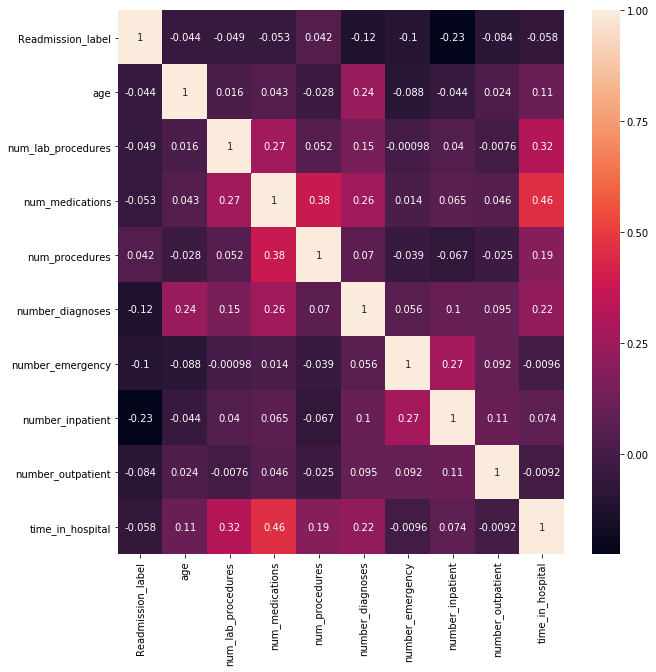

In [37]:
# Which variables are correlated with each other?
corr = diabetic_data[diabetic_data.columns.difference(['encounter_id', 'patient_nbr','admission_type_id',
                                                  'discharge_disposition_id','admission_source_id'])].corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot = True, ax=ax)

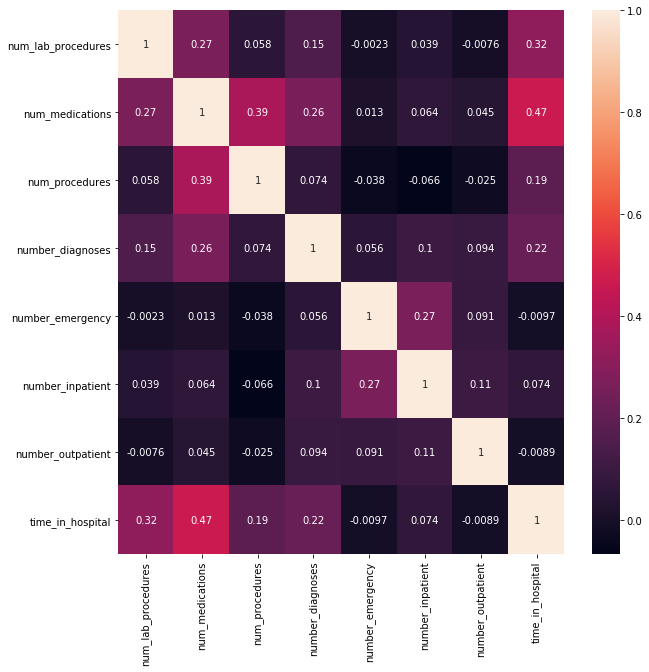

In [38]:
# Which variables are correlated with each other?
corr = eda_data[eda_data.columns.difference(['encounter_id', 'patient_nbr','admission_type_id',
                                                  'discharge_disposition_id','admission_source_id'])].corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot = True, ax=ax)

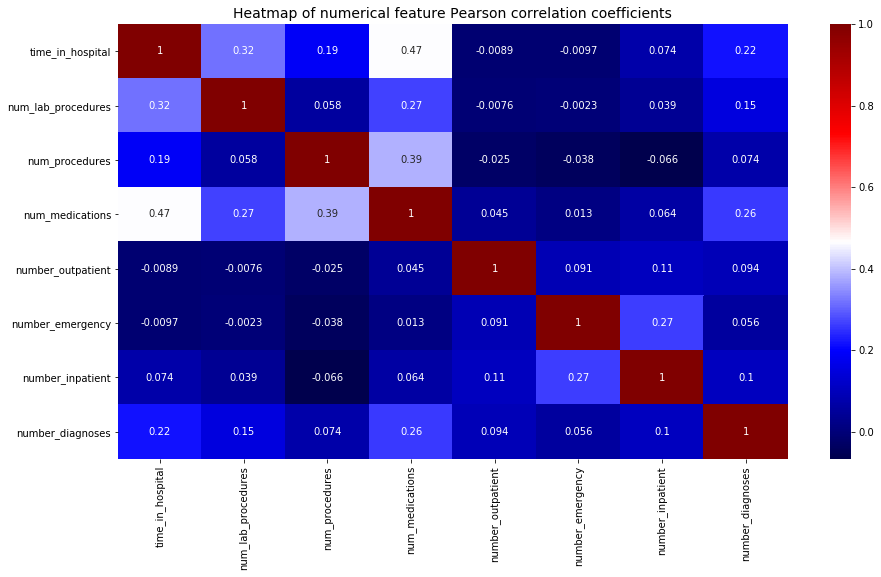

In [39]:
num_features_corr = eda_data[cols_nume].corr()
plt.figure(figsize=(15,8))
sns.heatmap(num_features_corr, annot=True, cmap='seismic')
#sns.heatmap(num_features_corr, annot = True, cmap='seismic')
plt.xticks(rotation=90); plt.title('Heatmap of numerical feature Pearson correlation coefficients', size=14);

From the above, no colinearity can be deduced. 
However, it can  be noted that  the  time spent in hospital is corelated to the number of medication

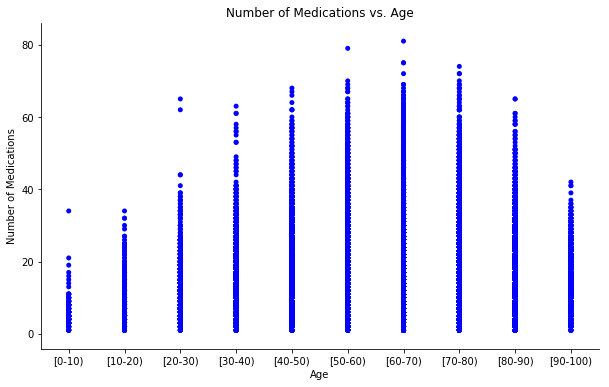

In [41]:
#Let's try to see how the age and number of medicines vary,
sortage = eda_data.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'blue')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

It can be seen that the number of medications used clearly increases with age, peaking at 60-70and then coming down to the range in 50s

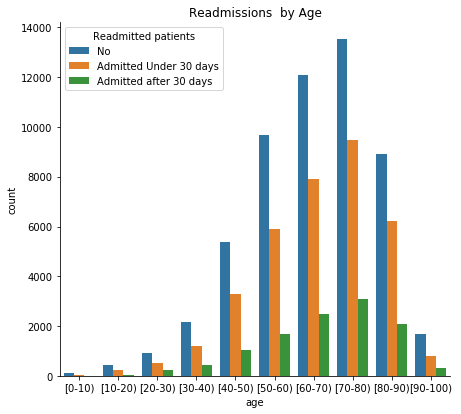

In [49]:
#Age and Readmissions,
plot1 = sns.countplot(x = 'age', hue = 'readmitted', data = eda_data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Admitted Under 30 days', 'Admitted after 30 days'))
plot1.axes.set_title('Readmissions  by Age')
plt.show()

All the 3 categories 'Admitted Under 30 days', 'Admitted after 30 days' and ' No readmissions'  follow a bell curve peaking at 70-80s

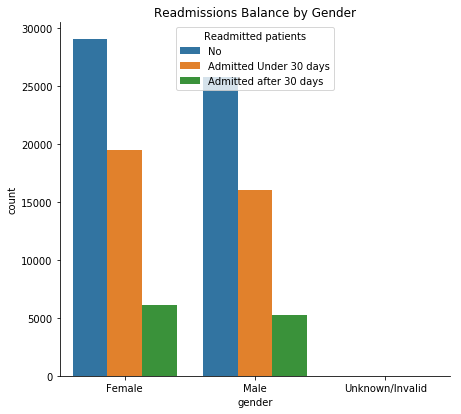

In [43]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'readmitted', data = eda_data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Admitted Under 30 days', 'Admitted after 30 days'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

In [50]:
All the 3 categories 'Admitted Under 30 days', 'Admitted after 30 days' and ' No readmissions'  have similar pattern for both the genders

SyntaxError: invalid syntax (<ipython-input-50-9a11fbcf89c2>, line 1)

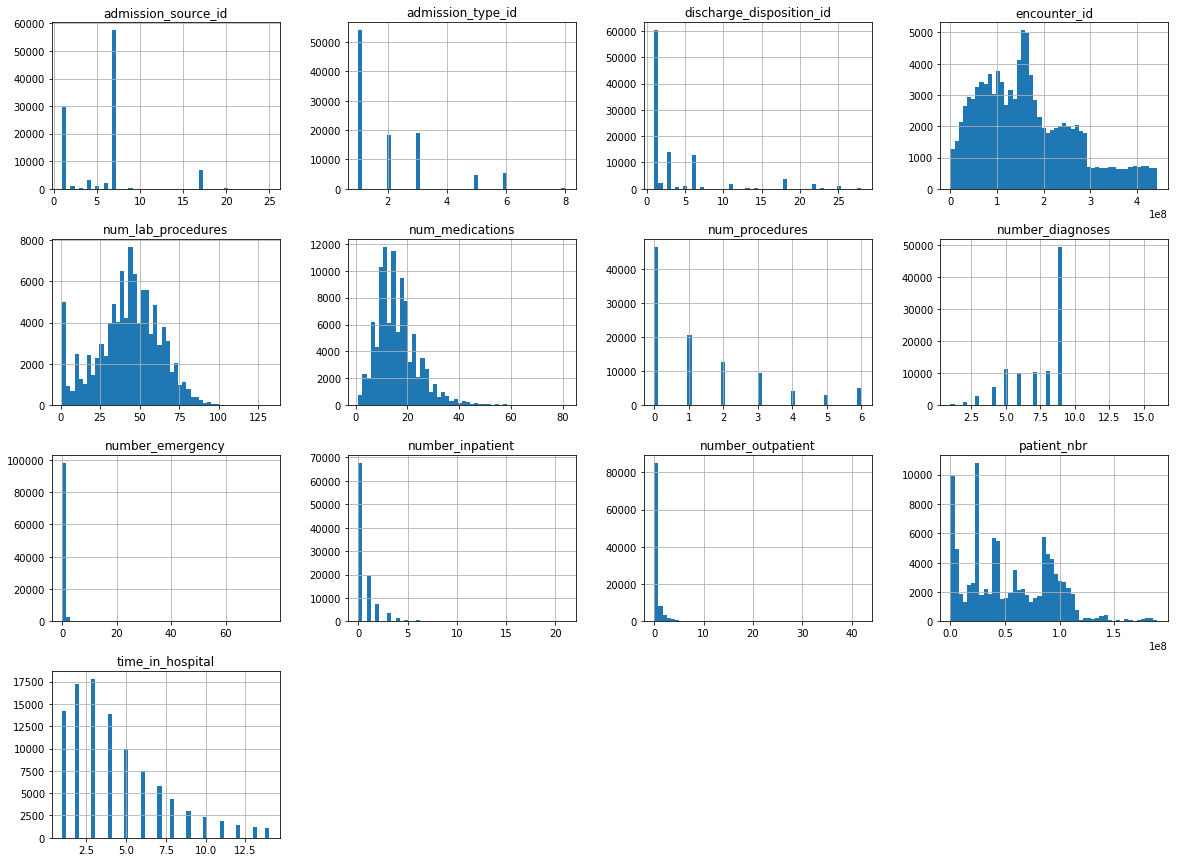

In [44]:
#Plotting the numerical variables in the dataset,

%matplotlib inline
import matplotlib.pyplot as plt
eda_data.hist(bins=50, figsize=(20,15))
plt.show()

It is interesting ot note that  the  number of lab procedures and number of medications taken  follow a bell curve in the population getting admitted to the hospital. It would be worth the effor to check for further relation

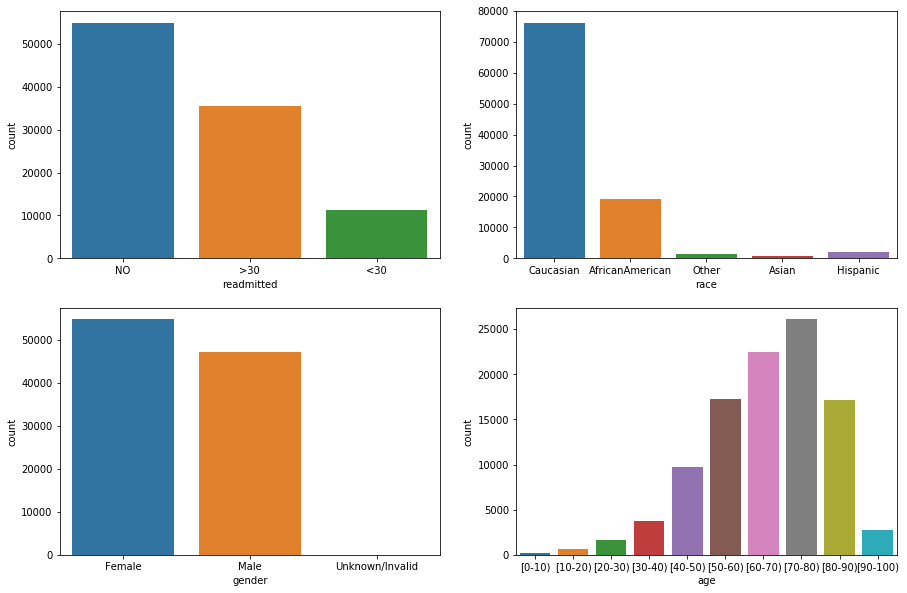

In [45]:
#Exploring the categorical variables,

import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=eda_data, ax=ax[0][0])
sns.countplot(x="race", data=eda_data, ax=ax[0][1])
sns.countplot(x="gender", data=eda_data, ax=ax[1][0])
sns.countplot(x="age", data=eda_data, ax=ax[1][1])

In [ ]:
Distribution vis a vis race would be about the diaspora of the population of the area. No significant learning there.
Female population has more cases of admission
Age pattern followsa bell curve